# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Run a PCA Algorithm to get 2 Principle Components for the 9 X features

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca.fit(X_scaled)

PCA(n_components=2)

In [10]:
loadings=pca.components_
var_exp=pca.explained_variance_ratio_
var_exp

array([0.4595174 , 0.17181626])

# 2.) Plot a Scatter plot of the PCs on the axis

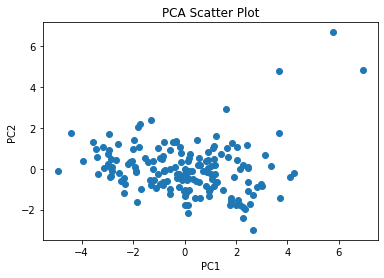

In [11]:
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()

# 3.) Rank the features in order of importance according to PCA

In [12]:
# Compute the contribution of each feature to the principal components
feature_importance = np.abs(pca.components_) * np.sqrt(pca.explained_variance_.reshape(-1,1))

# Rank the features by their overall contribution to the principal components
feature_importance_sum = np.sum(feature_importance, axis=0)
feature_ranking = np.argsort(feature_importance_sum)[::-1]

# Index the ranked features with custom feature names
feature_dict = dict(zip(range(len(X.columns)), X.columns))
feature_ranking_named = [feature_dict[i] for i in feature_ranking]

# Print the ranked features with custom names
print("Feature ranking based on PCA:")
for i, feature in enumerate(feature_ranking_named):
    print("{}. {}: {:.2f}".format(i+1, feature, feature_importance_sum[feature_ranking[i]]))

Feature ranking based on PCA:
1. exports: 1.34
2. imports: 1.17
3. life_expec: 1.15
4. child_mort: 1.10
5. total_fer: 1.02
6. gdpp: 0.86
7. income: 0.84
8. health: 0.61
9. inflation: 0.40


# 4.) Plot a heatmap of the feature importance (Fill in all parameters)

In [13]:
feature_names = df.columns[1:]

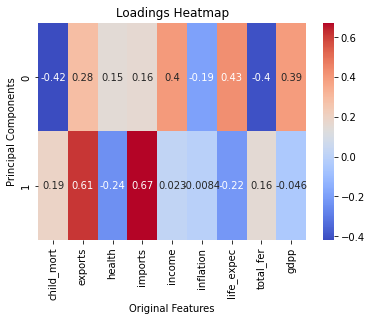

In [19]:

sns.heatmap(loadings, annot=True, cmap='coolwarm', xticklabels=feature_names)

plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings Heatmap')
plt.show()

# 5.) Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

[]

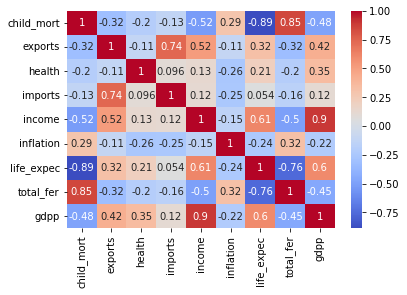

In [20]:
sns.heatmap(X.corr(),annot=True,cmap='coolwarm')
plt.plot()

In graph 4, it can be found that both exports and imports have high loadings in the same component, suggesting that these variables are strongly correlated and may be measuring the same underlying structure. As a corroboration, in graph 5, we can find that the correlation between exports and imports is indeed high, at about 0.74.

# 6.) Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

In [16]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

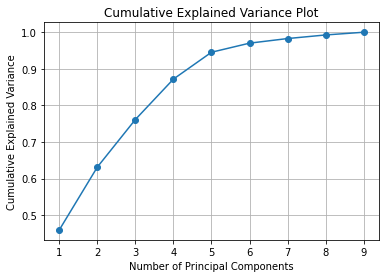

In [17]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

In [18]:
num_components=np.argmax(cumulative_explained_variance>=0.95)+1
print(num_components)

6


So we should use 6 PCs if we want to retain 95% of the variance.